In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Import the NeuroElectro Data
df = pd.read_excel ('neurophysiology_data.xlsx')
mouse_df = pd.DataFrame (df)
mouse_df

#pull out all the rows where "CA3" is in the NeuroType column and create a new DataFrame 
df_CA3 = df[df['NeuronType'].str.contains('CA3')].reset_index(drop=True)
df_CA3

#did the same thing for CA1 cells 
df_CA1 = df[df['NeuronType'].str.contains('CA1')].reset_index(drop=True)
df_CA1

#get all the columns of df_CA3 with ephys we are interested in
print(df_CA3[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

#did the same thing for df_CA1
print(df_CA1[['FiringFrequency','SpikeHalfWidth','SpikeAmplitude']])

    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.54             NaN
1               NaN            0.84             NaN
2               NaN            1.70            85.0
3               NaN            0.79             NaN
4               NaN            1.70            80.0
5             118.0             NaN            74.5
6               NaN            0.55            92.2
7               NaN            1.30            73.9
8               NaN            1.18             NaN
9               NaN             NaN             NaN
10              NaN            1.10            76.0
11              NaN            0.57             NaN
    FiringFrequency  SpikeHalfWidth  SpikeAmplitude
0               NaN            0.40             NaN
1               NaN             NaN             NaN
2               NaN             NaN             NaN
3               NaN            0.67             NaN
4             206.0             NaN             NaN
5           

In [3]:

# Import the Neuropixels Cache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
session_ca1_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA1' in structure_list:
        session_ca1_list.append(sessions.index[idx])   

session_ca3_list = []

for idx,structure_list in enumerate(sessions['ecephys_structure_acronyms']):
    if 'CA3' in structure_list:
        session_ca3_list.append(sessions.index[idx]) 
        
        
session = cache.get_session_data(session_ca3_list[0])
allen_ca3 = session.units[session.units.ecephys_structure_acronym=='CA3']
allen_ca3_amplitude = allen_ca3['waveform_amplitude']
allen_ca3_half_width = allen_ca3['waveform_halfwidth']
allen_ca3_firing_rate = allen_ca3['firing_rate']

session_a = cache.get_session_data(session_ca1_list[0])
allen_ca1 = session_a.units[session.units.ecephys_structure_acronym == 'CA1']
allen_ca1_amplitude = allen_ca1['waveform_amplitude']
allen_ca1_half_width = allen_ca1['waveform_halfwidth']
allen_ca1_firing_rate = allen_ca1['firing_rate']

print(allen_ca1_firing_rate)

unit_id
950911195     8.201781
950911223    15.087965
950911266    23.864839
950911286     2.396609
950912928     0.983724
               ...    
950954922     3.566261
950955053    16.898391
950955212     4.665299
950955361     3.913271
950955399    24.848122
Name: firing_rate, Length: 145, dtype: float64


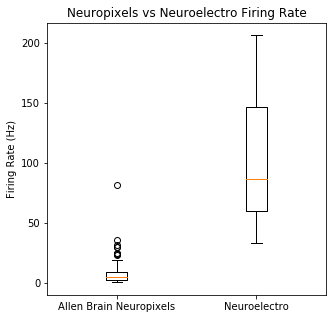

In [30]:
#FIRING RATE BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_firing_rate, df_CA1['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

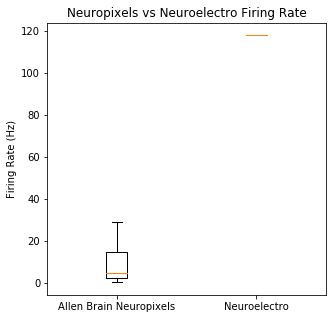

In [31]:

#FIRING RATE FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_firing_rate, df_CA3['FiringFrequency'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Firing Rate (Hz)')
ax.set_title('Neuropixels vs Neuroelectro Firing Rate')
plt.show()

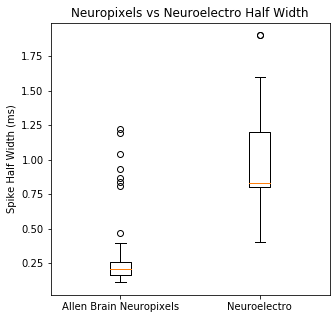

In [26]:
#SPIKE WIDTH BOX PLOT FOR CA1
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_half_width, df_CA1['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Spike Half Width (ms)')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

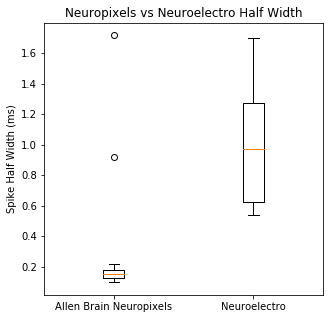

In [27]:

#BOXPLOT FOR SPIKE HALF WIDTH FOR CA3
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_half_width.dropna(), df_CA3['SpikeHalfWidth'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Spike Half Width (ms)')
ax.set_title('Neuropixels vs Neuroelectro Half Width')
plt.show()

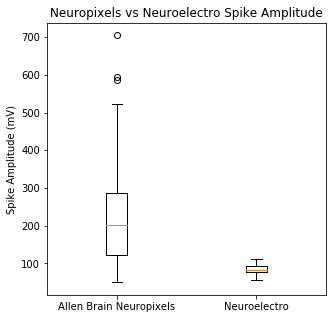

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca1_amplitude.dropna(), df_CA1['SpikeAmplitude'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Spike Amplitude (mV)')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
ax.annotate
plt.show()

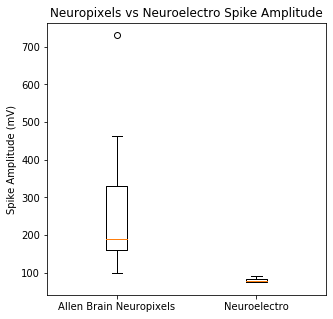

In [29]:
fig,ax = plt.subplots(figsize=(5,5))
data = [allen_ca3_amplitude.dropna(), df_CA3['SpikeAmplitude'].dropna()]
plt.boxplot(data)
ax.set_xticklabels(['Allen Brain Neuropixels','Neuroelectro'])
ax.set_ylabel('Spike Amplitude (mV)')
ax.set_title('Neuropixels vs Neuroelectro Spike Amplitude')
plt.show()

In [12]:
frame = [allen_ca1_firing_rate, df_CA1['FiringFrequency'].dropna()]
df_result_CA1_firing_rate = pd.concat(frame)
df_result_CA1_firing_rate

frame = [allen_ca3_firing_rate, df_CA3['FiringFrequency'].dropna()]
df_result_CA3_firing_rate = pd.concat(frame)
df_result_CA3_firing_rate

#merge NeuroPixels and Neuroelectro CA1 and CA3 spike half width data 
frame = [allen_ca1_half_width, df_CA1['SpikeHalfWidth'].dropna()]
df_result_CA1_half_width = pd.concat(frame)
df_result_CA1_half_width

frame = [allen_ca3_half_width, df_CA3['SpikeHalfWidth'].dropna()]
df_result_CA3_half_width = pd.concat(frame)
df_result_CA3_half_width

frame = [allen_ca1_amplitude, df_CA1['SpikeAmplitude'].dropna()]
df_result_CA1_amplitude = pd.concat(frame)
df_result_CA1_amplitude

frame = [allen_ca3_amplitude, df_CA3['SpikeAmplitude'].dropna()]
df_result_CA3_amplitude = pd.concat(frame)
df_result_CA3_amplitude

950936572     97.998030
950936639    193.194690
950936710    151.189350
950936675    253.296225
950936656    389.819040
950936759    187.906485
950936870    343.088850
950936855    290.611620
950936727    461.618820
950936941    181.784655
950936979    730.104375
950936908    144.401790
950936992    186.037020
950937050    150.797595
2             85.000000
4             80.000000
5             74.500000
6             92.200000
7             73.900000
10            76.000000
dtype: float64

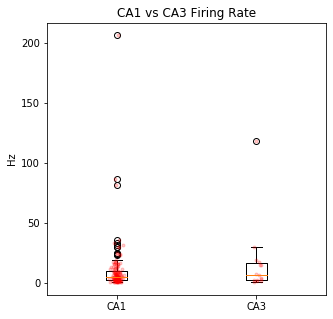

In [13]:

#boxplot for CA1 and CA3 firing rate data 
fig,ax = plt.subplots(figsize=(5,5))
data = [df_result_CA1_firing_rate, df_result_CA3_firing_rate]
plt.boxplot(data)
for i in [1,2]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
ax.set_xticklabels(['CA1','CA3'])
ax.set_ylabel('Hz')
ax.set_title('CA1 vs CA3 Firing Rate')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


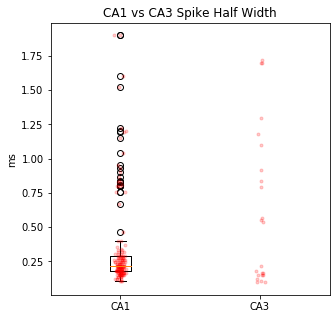

In [14]:
#boxplot for CA1 and CA3 spike half width data 
fig,ax = plt.subplots(figsize=(5,5))
data = [df_result_CA1_half_width, df_result_CA3_half_width]
plt.boxplot(data)
for i in [1,2]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
ax.set_xticklabels(['CA1','CA3'])
ax.set_ylabel('ms')
ax.set_title('CA1 vs CA3 Spike Half Width')
plt.show()

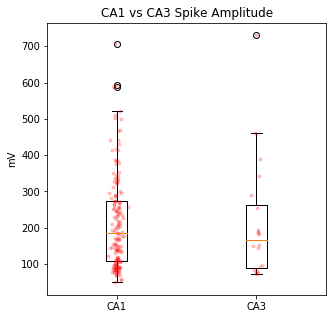

In [32]:
#boxplot for CA1 and CA3 spike half width data 
fig,ax = plt.subplots(figsize=(5,5))
data = [df_result_CA1_amplitude, df_result_CA3_amplitude]
plt.boxplot(data)
for i in [1,2]:
    y = data[i-1]
    x = np.random.normal(i, 0.02, len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
ax.set_xticklabels(['CA1','CA3'])
ax.set_ylabel('mV')
ax.set_title('CA1 vs CA3 Spike Amplitude')
plt.show()

In [16]:
from scipy import stats
print(stats.describe(df_CA1['SpikeHalfWidth'].dropna()))
print(stats.describe(df_CA3['SpikeHalfWidth'].dropna()))
print(stats.describe(df_CA1['FiringFrequency'].dropna()))
print(stats.describe(df_CA3['FiringFrequency'].dropna()))
print(stats.describe(df_CA1['SpikeAmplitude'].dropna()))
print(stats.describe(df_CA3['SpikeAmplitude'].dropna()))

DescribeResult(nobs=17, minmax=(0.4, 1.9), mean=1.0452941176470587, variance=0.1907764705882353, skewness=0.8466614489741058, kurtosis=-0.3805757644850307)
DescribeResult(nobs=10, minmax=(0.54, 1.7), mean=1.0270000000000001, variance=0.19708999999999996, skewness=0.3943833909947903, kurtosis=-1.1806692296973336)
DescribeResult(nobs=3, minmax=(33.2, 206.0), mean=108.39999999999999, variance=7841.28, skewness=0.4349828375463192, kurtosis=-1.4999999999999996)
DescribeResult(nobs=1, minmax=(118.0, 118.0), mean=118.0, variance=nan, skewness=0.0, kurtosis=-3.0)
DescribeResult(nobs=13, minmax=(56.0, 112.0), mean=83.14307692307692, variance=273.7930730769231, skewness=0.004994652097478402, kurtosis=-0.5579066505129573)
DescribeResult(nobs=6, minmax=(73.9, 92.2), mean=80.26666666666667, variance=51.37466666666667, skewness=0.7603035444467767, kurtosis=-0.8302627471344834)


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
print(stats.ranksums(df_result_CA1_firing_rate, df_result_CA3_firing_rate))
print(stats.ranksums(df_result_CA1_half_width, df_result_CA3_half_width))
print(stats.ranksums(df_result_CA1_amplitude, df_result_CA3_amplitude))

RanksumsResult(statistic=-0.7578201399641389, pvalue=0.44855866380054144)
RanksumsResult(statistic=-1.1192530713723583, pvalue=0.26303219012016477)
RanksumsResult(statistic=0.6678648215342755, pvalue=0.5042198845577079)


In [18]:
print(np.median(df_CA1['SpikeHalfWidth'].dropna()))
print(np.median(df_CA3['SpikeHalfWidth'].dropna()))
print(np.median(df_CA1['FiringFrequency'].dropna()))
print(np.median(df_CA3['FiringFrequency'].dropna()))
print(np.median(df_CA1['SpikeAmplitude'].dropna()))
print(np.median(df_CA3['SpikeAmplitude'].dropna()))


0.83
0.97
86.0
118.0
82.6
78.0


In [23]:
#stats for neuroelectro and allen firing rates ca3 and ca1 individually to determine intra vs extra differences
print(stats.describe(allen_ca1_firing_rate))
print(stats.describe(df_CA1['FiringFrequency'].dropna()))
print(stats.describe(allen_ca3_firing_rate))
print(stats.describe(df_CA3['FiringFrequency'].dropna()))

DescribeResult(nobs=145, minmax=(0.102523817602014, 81.7015463997864), mean=7.275172183375632, variance=86.23862238276374, skewness=4.250489798409665, kurtosis=27.694442897272676)
DescribeResult(nobs=3, minmax=(33.2, 206.0), mean=108.39999999999999, variance=7841.28, skewness=0.4349828375463192, kurtosis=-1.4999999999999996)
DescribeResult(nobs=14, minmax=(0.309688581830122, 29.2632335146168), mean=8.715714451113053, variance=76.43595754813171, skewness=1.0103401916279207, kurtosis=0.009138094874939107)
DescribeResult(nobs=1, minmax=(118.0, 118.0), mean=118.0, variance=nan, skewness=0.0, kurtosis=-3.0)


In [24]:
#stats for neuroelectro and allen half widths ca3 and ca1 individually to determine intra vs extra differences
print(stats.describe(allen_ca1_half_width))
print(stats.describe(df_CA1['SpikeHalfWidth'].dropna()))
print(stats.describe(allen_ca3_half_width))
print(stats.describe(df_CA3['SpikeHalfWidth'].dropna()))

DescribeResult(nobs=145, minmax=(0.109882747068677, 1.22244556113903), mean=0.25026742909952054, variance=0.032573842802689094, skewness=3.7443826316678277, kurtosis=14.625889553018734)
DescribeResult(nobs=17, minmax=(0.4, 1.9), mean=1.0452941176470587, variance=0.1907764705882353, skewness=0.8466614489741058, kurtosis=-0.3805757644850307)
DescribeResult(nobs=14, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)
DescribeResult(nobs=10, minmax=(0.54, 1.7), mean=1.0270000000000001, variance=0.19708999999999996, skewness=0.3943833909947903, kurtosis=-1.1806692296973336)


In [25]:
#stats for neuroelectro and allen spike amplitudes ca3 and ca1 individually to determine intra vs extra differences
print(stats.describe(allen_ca_amplitude.dropna()))
print(stats.describe(df_CA1['SpikeAmplitude'].dropna()))
print(stats.describe(allen_ca3_amplitude.dropna()))
print(stats.describe(df_CA3['SpikeAmplitude'].dropna()))

DescribeResult(nobs=145, minmax=(49.34397, 704.97297), mean=225.32777710344828, variance=16051.637455394857, skewness=1.0817658717358247, kurtosis=1.0597470454554587)
DescribeResult(nobs=13, minmax=(56.0, 112.0), mean=83.14307692307692, variance=273.7930730769231, skewness=0.004994652097478402, kurtosis=-0.5579066505129573)
DescribeResult(nobs=14, minmax=(97.9980299999999, 730.104375), mean=268.7034675, variance=28457.50871873959, skewness=1.5841366742465814, kurtosis=1.9719072940247493)
DescribeResult(nobs=6, minmax=(73.9, 92.2), mean=80.26666666666667, variance=51.37466666666667, skewness=0.7603035444467767, kurtosis=-0.8302627471344834)
